<a href="https://colab.research.google.com/github/joaoSouza2121/machine-learning/blob/main/Aprendizado_Baseado_Em_Instancias_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aprendizado Basedo em Instância

In [2]:
install.packages("class")
library(class)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [4]:
dim(iris)

[1] 150   5

In [6]:
# Divisão em treino e teste
amostra <- sample(2, 150, replace = T, prob = c(0.7, 0.3))
iristreino <- iris[amostra==1, ]
iristeste <- iris[amostra==2, ]

In [7]:
print(dim(iristreino))
print(dim(iristeste))

[1] 101   5
[1] 49  5


Fazendo a classificação sem criar o modelo

Dados de treino (instancias), dados de teste, classe real, numero de vizinhos considerados.

In [8]:
previsao <- knn(iristreino[, 1:4], iristeste[, 1:4], iristreino[,5], k=3)

In [10]:
# Matriz de confusão
tabela <- table(iristeste[,5], previsao)
tabela

            previsao
             setosa versicolor virginica
  setosa         16          0         0
  versicolor      0         11         2
  virginica       0          2        18

In [12]:
# Avaliando a performance
acerto <- (tabela[1] + tabela[5] + tabela[9]) / sum(tabela)
acerto 

[1] 0.9183673

#Ensamble Learning

In [14]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [15]:
# Carrega a base de dados
credito <- read.csv("dados/Credit.csv")

# Transforma em fator a variavel class
credito$class = as.factor(credito$class)

In [17]:
# Gera uma amostra randomica e separa os dados em treino e teste
samples <- sample(2, 1000, replace = T, prob = c(0.7, 0.3))
cred_treino <- credito[samples==1, ]
cred_teste <- credito[samples==2, ]

In [18]:
#  Gera o modelo de floresta aleatoria com randomForest
modelo <- randomForest(class ~ ., data = cred_treino, ntree = 100, importance = T)

In [19]:
# visualizando o modelo em formato de texto
modelo


Call:
 randomForest(formula = class ~ ., data = cred_treino, ntree = 100,      importance = T) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 4

        OOB estimate of  error rate: 21.77%
Confusion matrix:
     bad good class.error
bad   84  121  0.59024390
good  34  473  0.06706114

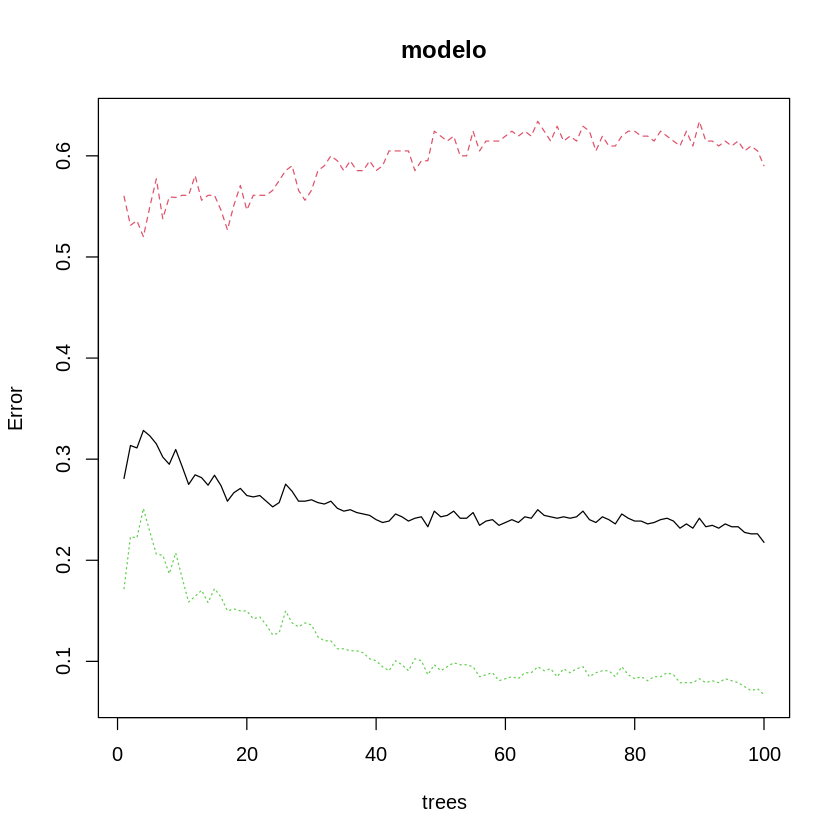

In [20]:
plot(modelo)

In [21]:
# Previsão
prever <- predict(modelo, cred_teste)

# Matriz de confusao
confusao <- table(prever, cred_teste$class)
confusao

      
prever bad good
  bad   28   18
  good  67  175

In [22]:
# Taxa de acerto
taxa_acerto <- (confusao[1] + confusao[4]) / sum(confusao)
taxa_acerto

[1] 0.7048611

# Codificação de Categorias

In [1]:

install.packages('data.table')

library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
tit <- as.data.frame(Titanic)

Data Matrix é a função nativa do R

Label encoder de class, sex e age

In [7]:
labenc <- data.matrix(tit[, 1:3])
labenc = as.data.frame(labenc)

In [10]:
head(labenc)

,Class,Sex,Age
,<int>,<int>,<int>
1,1,1,1
2,2,1,1
3,3,1,1
4,4,1,1
5,1,2,1
6,2,2,1


One Hot Encoding das mesmas colunas

In [4]:
install.packages('mltools')
library(mltools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
hotenc <- one_hot(as.data.table( tit[, 1:3]))
head(hotenc)

Class_1st,Class_2nd,Class_3rd,Class_Crew,Sex_Male,Sex_Female,Age_Child,Age_Adult
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,1,0,1,0
0,1,0,0,1,0,1,0
0,0,1,0,1,0,1,0
0,0,0,1,1,0,1,0
1,0,0,0,0,1,1,0
0,1,0,0,0,1,1,0


#Dimensionamento de Características

<font color="orange">Padronização</font>

In [18]:
iris_pad <- scale(iris[, 1:4])
head(iris_pad)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.8976739,1.01560199,-1.335752,-1.311052
-1.1392005,-0.13153881,-1.335752,-1.311052
-1.3807271,0.32731751,-1.392399,-1.311052
-1.5014904,0.09788935,-1.279104,-1.311052
-1.0184372,1.24503015,-1.335752,-1.311052
-0.5353840,1.93331463,-1.165809,-1.048667


Função para Normalização

In [15]:
normaliza = function(x){
  return(((x-min(x))/max(x)-min(x)))
}

<font color="green">Aplicando a normalização</font>

In [19]:
iris_norm <- normaliza(iris[, 1:4])
head(iris_norm)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5329114,0.3303797,0.06455696,-0.08734177
2,0.5075949,0.2670886,0.06455696,-0.08734177
3,0.4822785,0.2924051,0.05189873,-0.08734177
4,0.4696203,0.2797468,0.07721519,-0.08734177
5,0.5202532,0.3430380,0.06455696,-0.08734177
6,0.5708861,0.3810127,0.10253165,-0.06202532


#<font color="blue">Comparando os dois modelos</font>

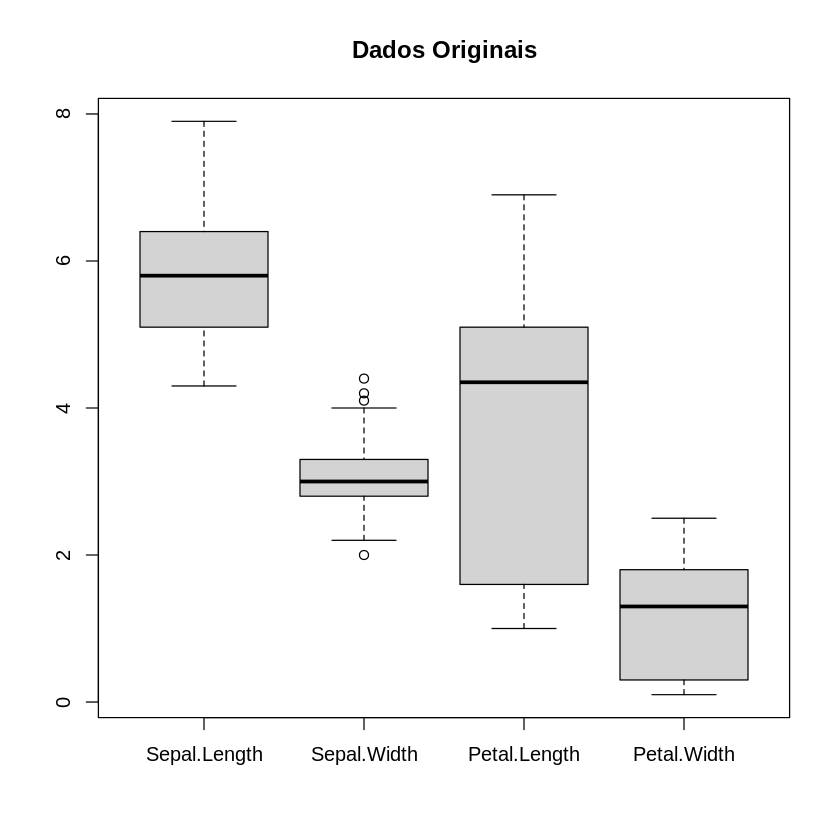

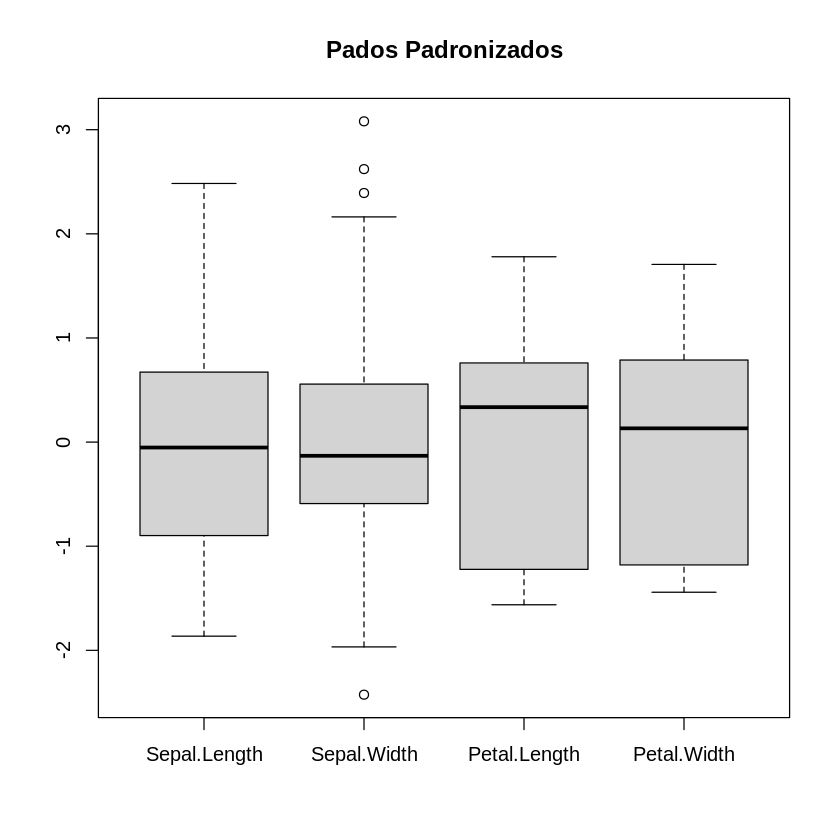

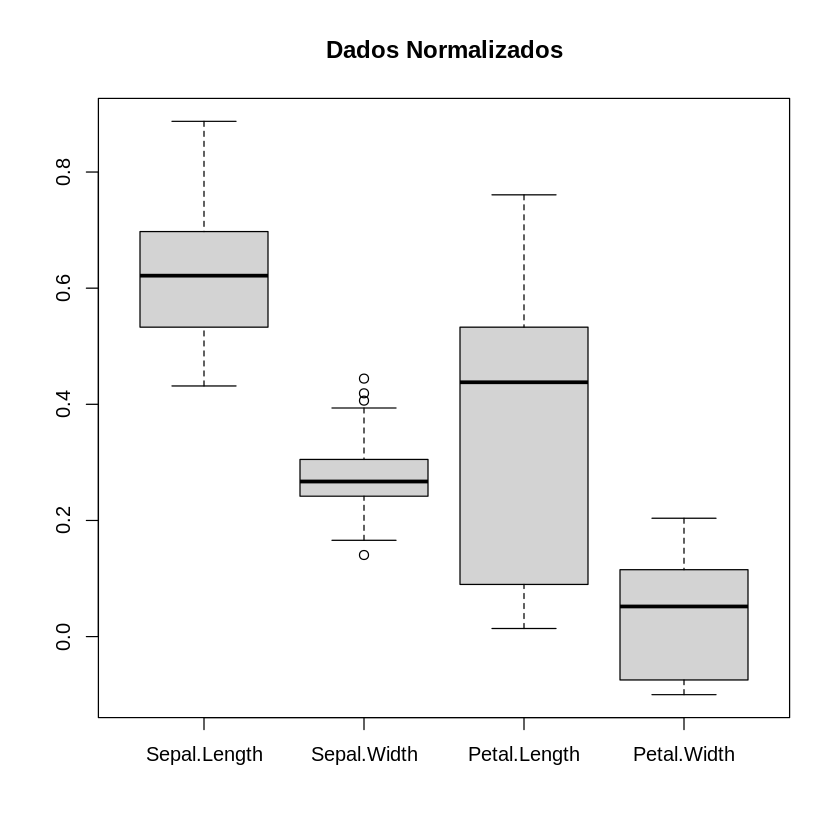

In [20]:
boxplot(iris[, 1:4], main = "Dados Originais")
boxplot(iris_pad, main = "Pados Padronizados")
boxplot(iris_norm, main = "Dados Normalizados")